In [ ]:
  import numpy as np
import pandas as pd
my_data=pd.read_csv("customer_churn.csv")
my_data.head()

df=my_data.iloc[:,3:]
df.head()

y=df.iloc[:,-1]
y.head()

X=df.iloc[:,:- 1]
X.head()
#Basic Data Preprocessing

############################################################################

# Create Dummy Variables
geo=pd.get_dummies(X.iloc[:,1],drop_first=True)
gen=pd.get_dummies(X.iloc[:,2],drop_first=True)

#Drop Old Variables which are replaced by Dumay Variables
X.head()
X=X.drop(['Geography','Gender'],axis=1)
X.head()
###########################################################################
X=pd.concat([X,geo,gen],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)



In [ ]:
#Scale the inputs
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
lr= LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
nb= GaussianNB()

In [ ]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from sklearn.metrics import RocCurveDisplay

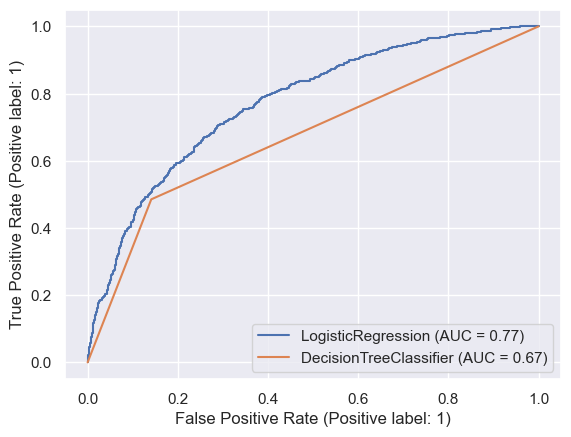

In [ ]:
roc= RocCurveDisplay.from_estimator(lr,X_test,y_test);
RocCurveDisplay.from_estimator(dt,X_test,y_test,ax=roc.ax_);

In [ ]:
roc= RocCurveDisplay.from_estimator(lr,X_test,y_test)
#RocCurveDisplay.from_estimator(dt,X_test,y_test,ax=roc.ax_);
#RocCurveDisplay.from_estimator(rf,X_test,y_test,ax=roc.ax_);
RocCurveDisplay.from_estimator(knn,X_test,y_test,ax=roc.ax_);
#RocCurveDisplay.from_estimator(nb,X_test,y_test,ax=roc.ax_);

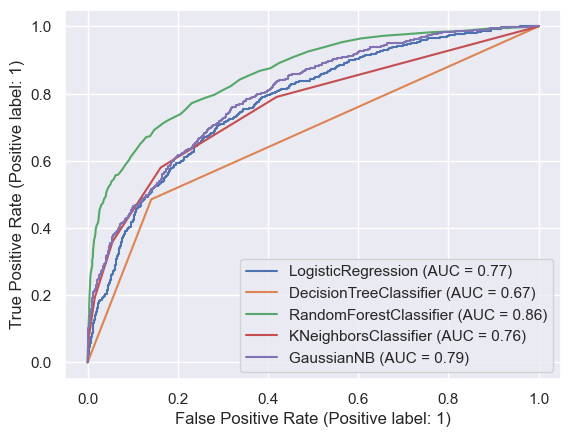

In [ ]:
roc= RocCurveDisplay.from_estimator(lr,X_test,y_test)
RocCurveDisplay.from_estimator(dt,X_test,y_test,ax=roc.ax_);
RocCurveDisplay.from_estimator(rf,X_test,y_test,ax=roc.ax_);
RocCurveDisplay.from_estimator(knn,X_test,y_test,ax=roc.ax_);
RocCurveDisplay.from_estimator(nb,X_test,y_test,ax=roc.ax_);

In [ ]:
# Old code will not work
roc=plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(dt,X_test,y_test,ax=roc.ax_);
plot_roc_curve(rf,X_test,y_test,ax=roc.ax_);
plot_roc_curve(knn,X_test,y_test,ax=roc.ax_);
plot_roc_curve(nb,X_test,y_test,ax=roc.ax_);